<a href="https://colab.research.google.com/github/valeriafigueredo-data/modelos_preditivos_classicos/blob/main/5.Regressao_Arvores_Decis%C3%A3o_valida%C3%A7%C3%A3o_cruzada_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Modelos preditivos clássicos**

Sala: 01

Alunos:

* Arthur Wanderley Ferreira dos Santos
* André Felipe Bezerra de Souza Leão
* Manuela de Lacerda Bezerra Carvalho
* Valéria Cristina Andrade Rodrigues de Figueredo
* Thiago Wanderley Amorim

# Arvores de Decisão - Regressão

Base de dados utilizada:
1. Carregamento de dados
2. O valor esperado de saída é **actual**
3. Remover as colunas 'year', 'month', 'day', 'week' pois não vamos considerar dados históricos relacionados a série temporal
4. Análise descritiva dos dados
5. Remoção de campos desnecessários
6. Tratamento de dados nulos e/ou faltantes
7. Separação dos dados, holdout
8. Normalização dos dados
9. Treinamento de modelos

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Obtenha os dados
** Leia o arquivo csv 'temps.csv' em um DataFrame **

In [4]:
df = pd.read_csv('temps.csv')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


** Verifique o cabeçalho do DataFrame.**

In [6]:
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [8]:
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


Remoção das colunas year,	month, day e week, pois não vamos trabalhar com a série temporal

In [9]:
df.drop(columns=["year", "month", "day", "week"], inplace=True)

In [10]:
df.head()

,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,45,45,45.6,45,43,50,44,29
1,44,45,45.7,44,41,50,44,61
2,45,44,45.8,41,43,46,47,56
3,44,41,45.9,40,44,48,46,53
4,41,40,46.0,44,46,46,46,41


## Estatística Descritiva

Dados faltantes

<Axes: >

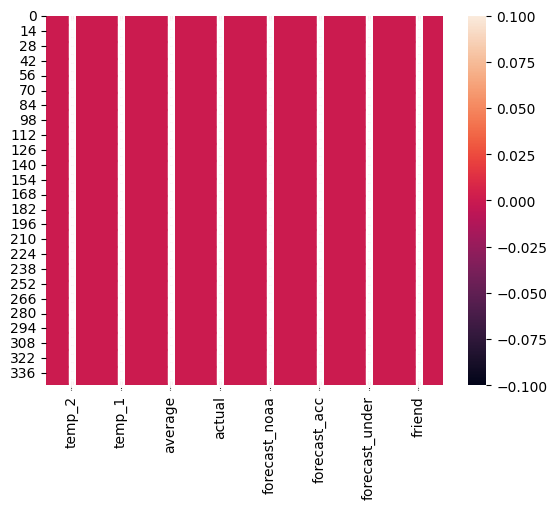

In [11]:
#df.isnull()
#heatmap
sns.heatmap(df.isnull(), annot=True)

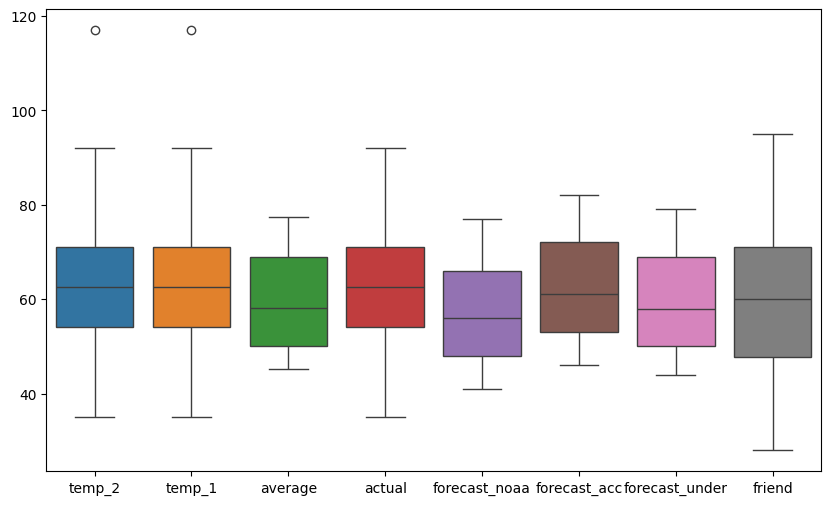

In [12]:
#plot dos valores com boxplot
plt.subplots(figsize=(10,6))
sns.boxplot(df)
plt.show()

<ipython-input-13-f028d4c5f8b7>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


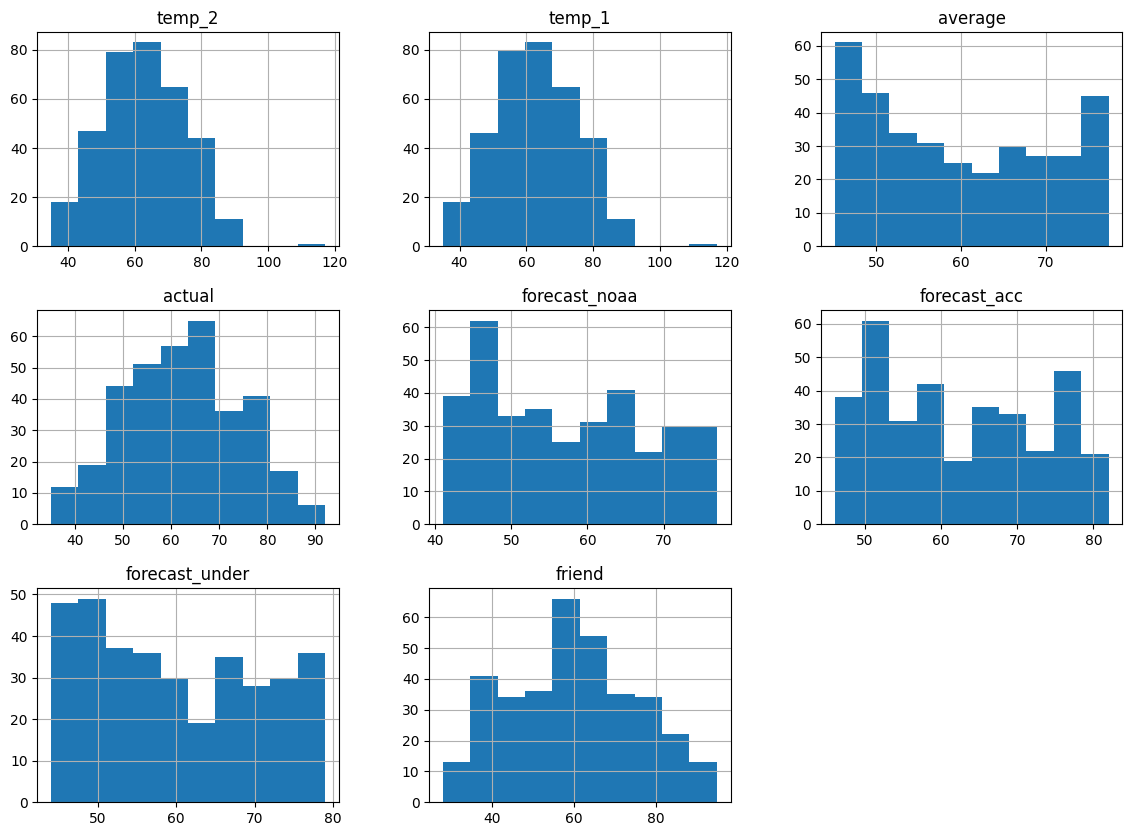

In [13]:
#plot dos valores com histogramas
fig = plt.figure(figsize = (14,10))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

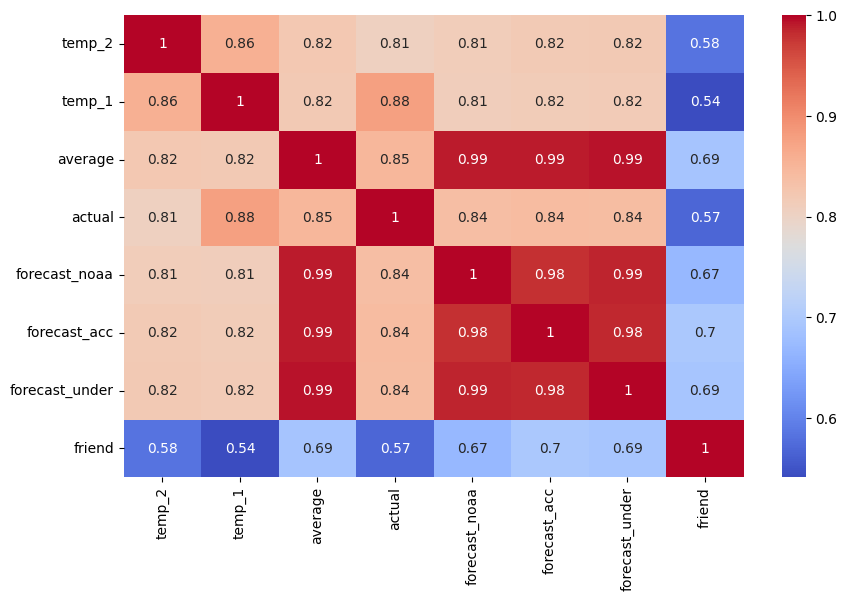

In [14]:
#plot dos valores com matriz de correlação
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

## Separação dos dados, holdout

Use o método train_test_split para dividir seus dados em um conjunto treino e teste.

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['actual']),
                                                    df['actual'],
                                                    test_size=0.3,
                                                    random_state=111)

In [17]:
pd.DataFrame(X_train)

,temp_2,temp_1,average,forecast_noaa,forecast_acc,forecast_under,friend
154,81,92,68.2,65,70,67,71
55,61,60,51.2,51,53,53,61
61,59,57,52.1,49,53,51,46
277,58,62,57.8,56,60,59,44
146,64,64,67.0,65,71,65,76
...,...,...,...,...,...,...,...
169,70,76,70.8,68,75,71,57
275,60,61,58.4,58,60,57,41
86,56,64,55.7,51,57,56,57
212,77,73,77.3,77,81,77,93


## Normalização dos dados

Hora de para padronizar as variáveis.

Import StandardScaler do Scikit-learn.

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

Converta as variáveis independentes com o StandardScaler

In [20]:
scaler.fit(X_train)

StandardScaler()

Use o método .transform () para transformar os parâmetros em uma versão padronizada.

In [21]:
X_train_scaled = scaler.transform(X_train)

In [22]:
X_test_scaled = scaler.transform(X_test)

In [23]:
X_train_scaled[:3]

array([[ 1.51648331,  2.36552985,  0.77074526,  0.69910044,  0.70846031,
         0.63982956,  0.68170615],
       [-0.19431263, -0.26561879, -0.85662436, -0.63930119, -0.92836829,
        -0.67301734,  0.02823635],
       [-0.36539222, -0.51228897, -0.7704695 , -0.83050142, -0.92836829,
        -0.8605669 , -0.95196835]])

In [24]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 154 to 340
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   temp_2          243 non-null    int64  
 1   temp_1          243 non-null    int64  
 2   average         243 non-null    float64
 3   forecast_noaa   243 non-null    int64  
 4   forecast_acc    243 non-null    int64  
 5   forecast_under  243 non-null    int64  
 6   friend          243 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 15.2 KB


In [25]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 49 to 329
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   temp_2          105 non-null    int64  
 1   temp_1          105 non-null    int64  
 2   average         105 non-null    float64
 3   forecast_noaa   105 non-null    int64  
 4   forecast_acc    105 non-null    int64  
 5   forecast_under  105 non-null    int64  
 6   friend          105 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 6.6 KB


## Árvores de Decisão

In [26]:
#importar a arvore de decisão
from sklearn import tree

In [27]:
model = tree.DecisionTreeRegressor()

In [28]:
model.fit(X_train_scaled, y_train)

DecisionTreeRegressor()

### Executar o modelo treinado na base de treinamento

In [29]:
#extrair as inferencias y_pred
y_test_pred = model.predict(X_test_scaled)

In [30]:
# treino
model.score(X_train_scaled, y_train)

1.0

In [31]:
# teste
model.score(X_test_scaled, y_test)

0.6375108513148935

### Avaliação de Regressores - Exibir os Resultados

In [32]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

In [33]:
def print_metrics(y_test, y_test_pred):
  print("MEAN: ", mean_absolute_error(y_test, y_test_pred))
  print("MAPE: ", mean_absolute_percentage_error(y_test, y_test_pred))
  print("MSE: ", mean_squared_error(y_test, y_test_pred))
  print("RMSE: ", mean_squared_error(y_test, y_test_pred)**2)
  print("R²: ", r2_score(y_test, y_test_pred))

In [34]:
print_metrics(y_test, y_test_pred)

MEAN:  5.285714285714286
MAPE:  0.08438413742803798
MSE:  50.6
RMSE:  2560.36
R²:  0.6375108513148935


## Validação cruzada com o algoritmo Árvores de Decisão

In [35]:
from sklearn.model_selection import cross_validate

In [36]:
reg_cv_scores = cross_validate(model, X_train_scaled, y_train)

In [37]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (reg_cv_scores['test_score'].mean(), reg_cv_scores['test_score'].std()))

0.71 accuracy with a standard deviation of 0.08


### Exiba a árvore de decisão do modelo treinado

In [38]:
from sklearn import tree

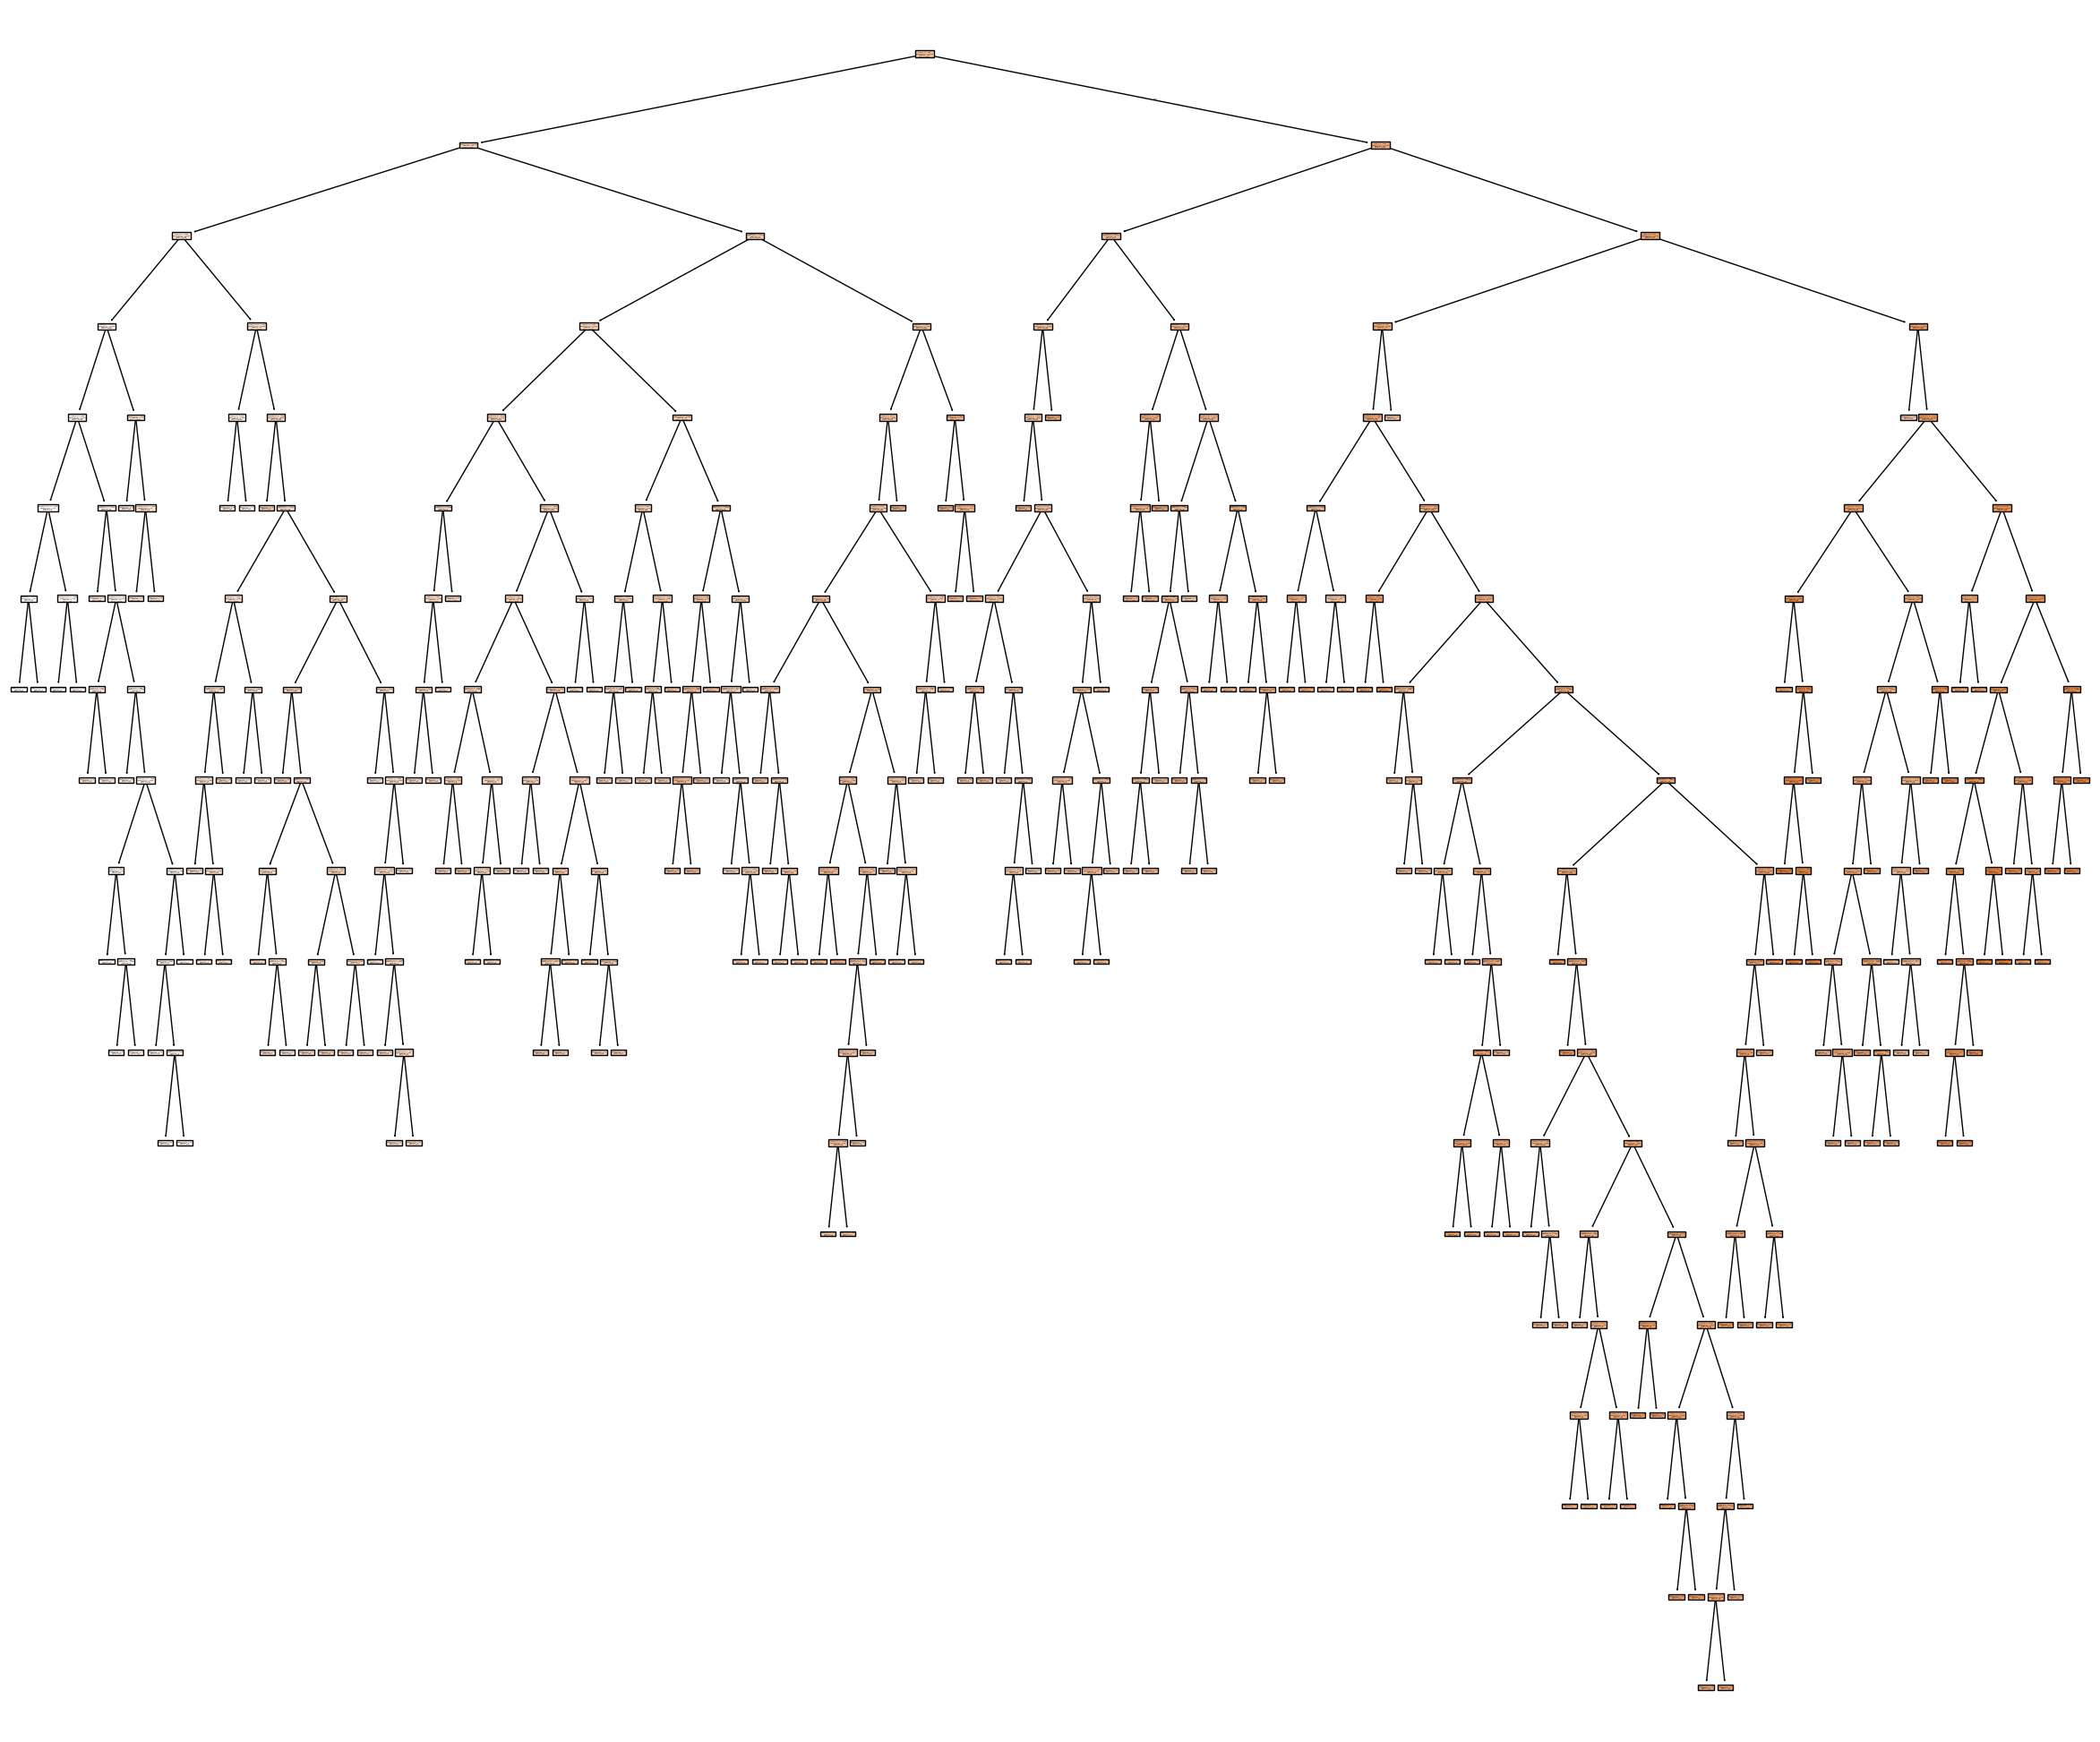

In [39]:
fig = plt.figure(figsize=(30,25))
_ = tree.plot_tree(model,
                   feature_names=X_train.columns,
                   class_names=y_test.unique(),
                   filled=True)

### Avaliar o melhor valor de max_depth

Text(0, 0.5, 'Score Rate')

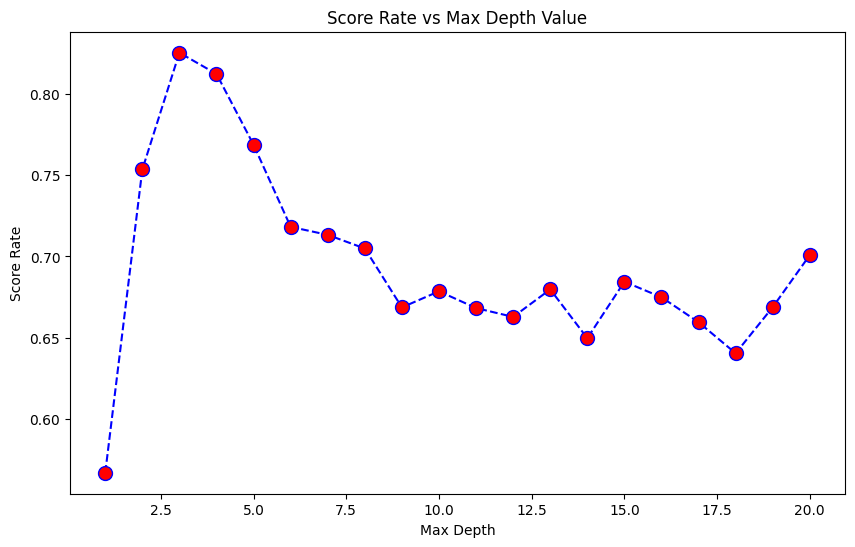

In [40]:
import numpy as np

score = []

for i in range(1,21):
  #MODELO
  classifier = tree.DecisionTreeRegressor(max_depth=i)
  #FIT
  classifier.fit(X_train_scaled, y_train)
  #SCORE
  score.append(classifier.score(X_test_scaled, y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,21), score, color='blue', linestyle='dashed', marker='o',
           markerfacecolor = 'red', markersize=10)
plt.title('Score Rate vs Max Depth Value')
plt.xlabel('Max Depth')
plt.ylabel('Score Rate')

### Criar um regressor com o melhor valor para max_depth e avalie





In [41]:
reg_best = tree.DecisionTreeRegressor(max_depth=score.index(max(score))+1)

reg_best.fit(X_train_scaled, y_train)
print('Train: ', reg_best.score(X_train_scaled, y_train))
print('Test: ',reg_best.score(X_test_scaled, y_test))
print(score.index(max(score))+1)

Train:  0.8412076385562377
Test:  0.8252012697176424
3


In [42]:
print_metrics(y_test, reg_best.predict(X_test_scaled))

MEAN:  3.9606007864016397
MAPE:  0.06453528235660878
MSE:  24.400222142844786
RMSE:  595.370840620173
R²:  0.8252012697176424


### Plot dos valores previstos vs reais

In [43]:
y_pred = reg_best.predict(X_test_scaled)

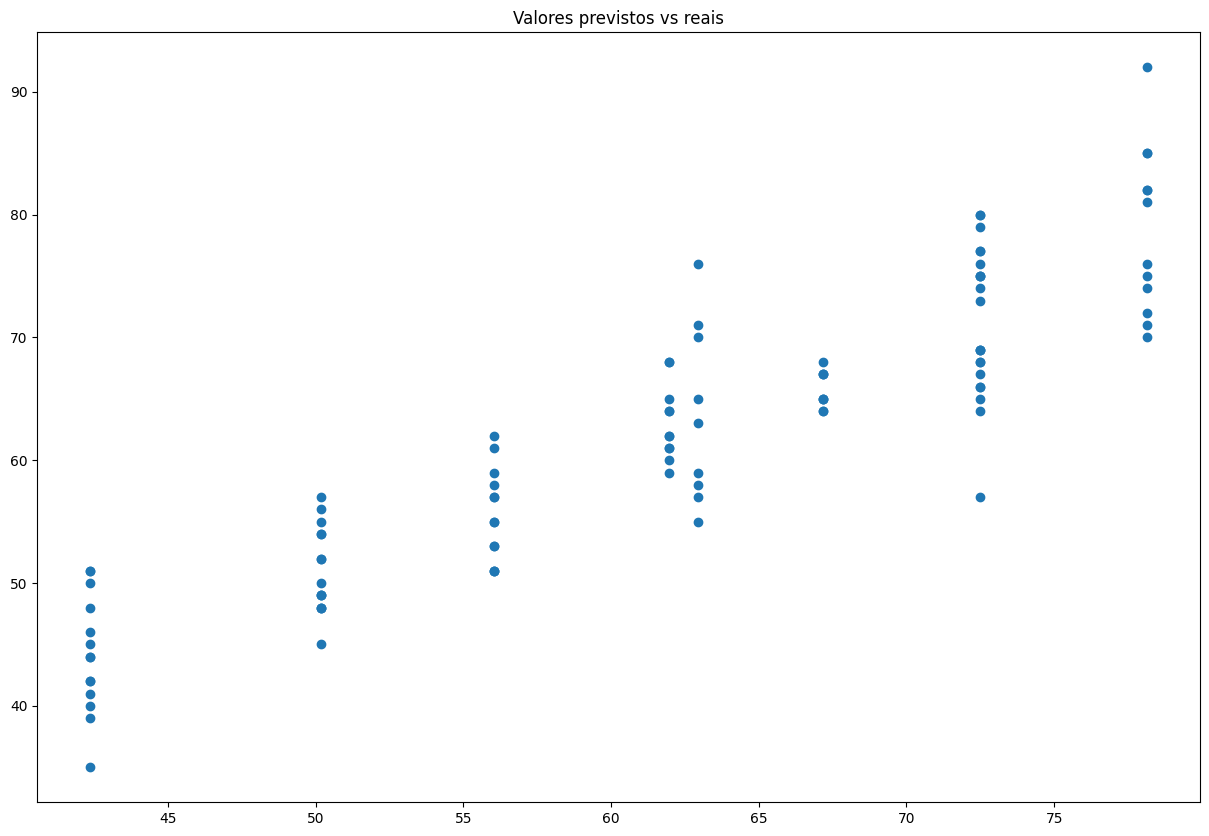

In [44]:
fig = plt.figure(figsize=(15,10))
plt.scatter(y_pred, y_test)
plt.title('Valores previstos vs reais')
plt.show()

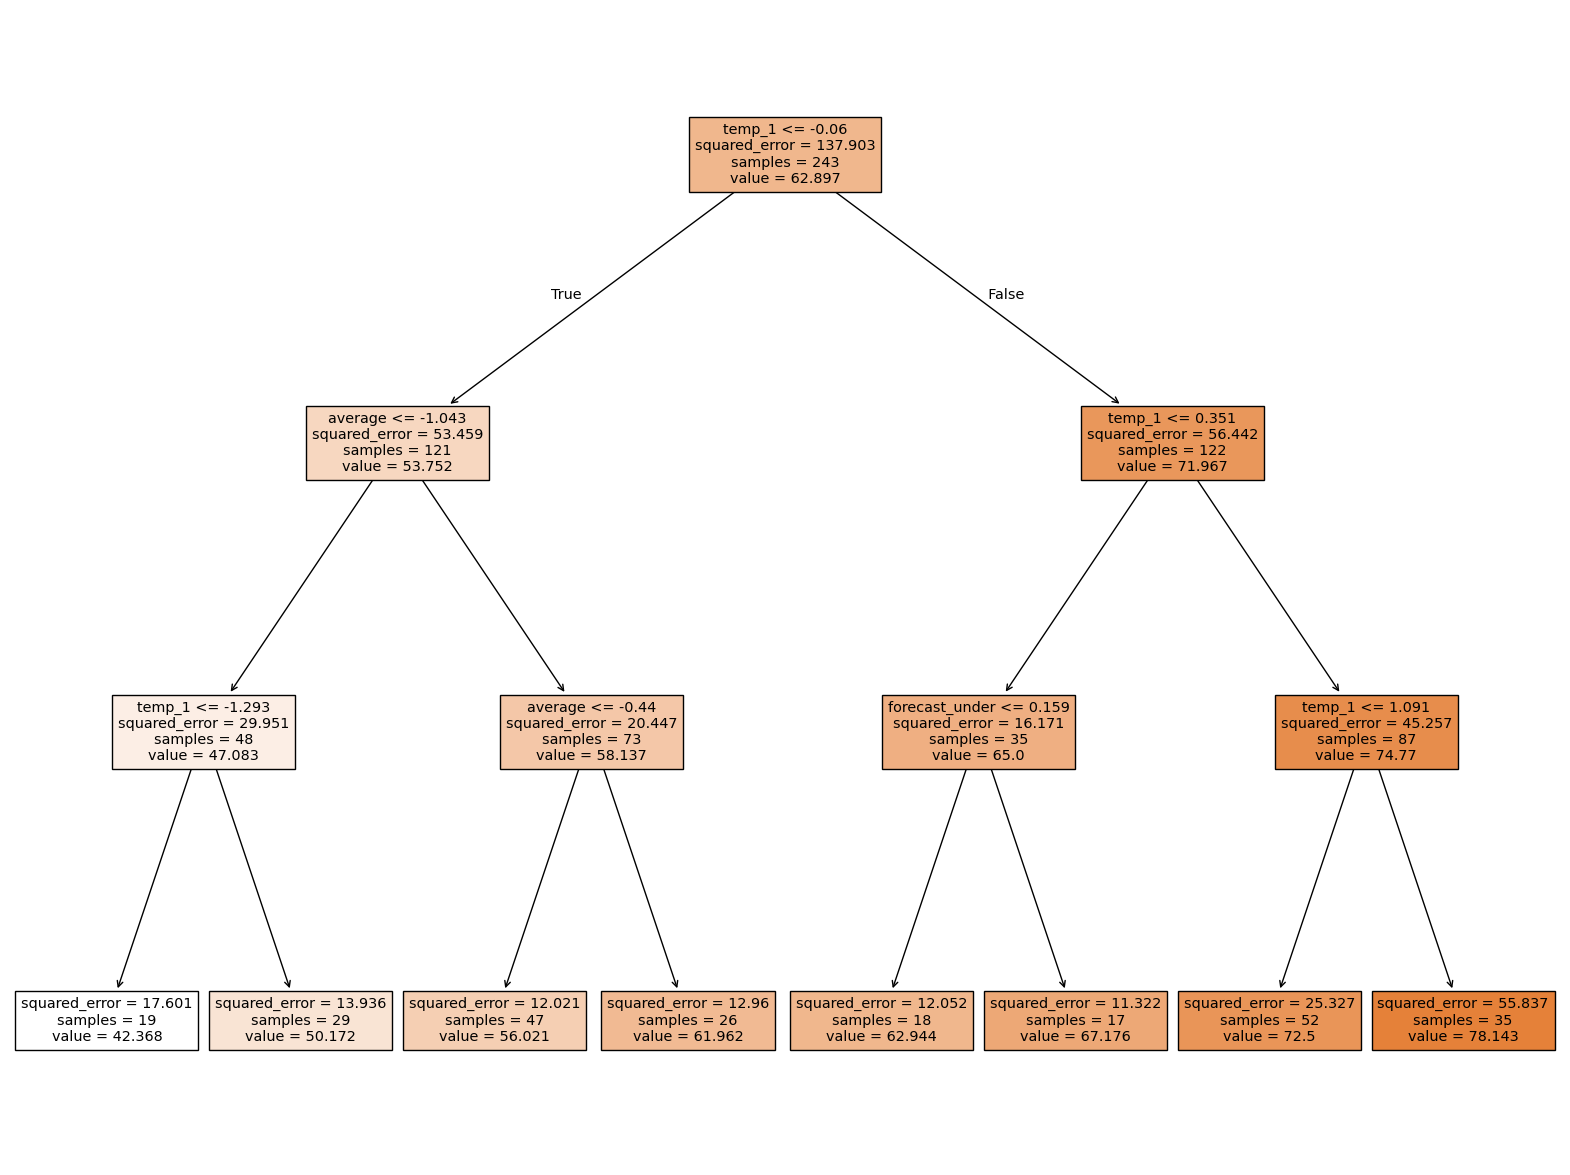

In [45]:
fig = plt.figure(figsize=(20,15))
plt.title('Melhor regressor')
_ = tree.plot_tree(reg_best,
                   feature_names=df.columns,
                   class_names=y_test.unique(),
                   filled=True)

**Conclusão**

O presente trabalho realizou o carregamento dos dados, a importação das bibliotecas, a análise exploratória dos dados para compreensão inicial, a remoção de coluna desnecessária, o tratamento de dados nulos e/ou faltantes, a separação dos dados em treino e teste, a normalização dos dados e o treinamento de modelos com árvore de decisão e a validação cruzada com árvore de decisão.

Na parte da exploração dos dados (EDA), foi possível verificar que as doze colunas tinham dados em todas as 348 linhas, de modo que não se tornou imprescindível a limpeza dos mesmos. Foram removidas as colunas 'year', 'month', 'day', 'week' pois não foram considerados dados históricos relacionados a série temporal.

Dentre as características do dataframe, constatou-se que as colunas apresentaram dados com valores bem próximos. A menor media foi forecast_noaa (57.238506) e o maior foi temp_2 (62.652299). O maior desvio padrão ficou na coluna friend (15.626179) e o menor desvio padrão foi visualizado na coluna average (10.527306). E a coluna friend foi a feature com o maior número máximo de dados (95.000000).

As colunas temp_1 e temp_2 foram as features que apresentaram uma distribuição mais próxima do normal, conforme o histograma. Já a matriz de correlação informou que as colunas forecast_noaa, forecast_acc e forecast_under tiveram altas correlações com a coluna average, em um nível de 0.99. Ademais, a coluna forecast_noaa teve alta correlação com forecast_under (0.99), a coluna forecast_acc com a forecast_under (0.98) e a feature forecast_noaa com a forecast_acc (0.98).

Os dados foram separados em treino (243) e teste(105), normalizados (via StandardScaler) e transformados para o formato padronizado (via transform).

Ocorreu a aplicação da técnica da árvore de decisão, com o treinamento e a execução do modelo. Posteriormente foram analisados o score do treino (1.0) e teste (0.67). Também ocorreu a avaliação dos regressores através das métricas MEAN, MAPE, MSE, RMSE e R². Os resultados foram bons mas podem ser melhorados. No MEAN foi  4.9714285714285715 e em R² foi 0.677969361604799.

Após a árvore de decisão, ocorreu a aplicação da validação cruzada com o algoritmo árvores de Decisão. O resultado foi 0.71 de acurácia com o desvio padrão de 0.06. Portanto, este algoritmo foi mais eficiente, inclusive apresentando melhor métrica de desempenho.

O valor de max_depth que resultou na melhor métrica de desempenho foi 3. Também foi criado um regressor com o melhor valor para max_depth. As métricas resultaram em: MEAN:  3.9606007864016397, MAPE:  0.06453528235660878, MSE:  24.400222142844786, RMSE:  595.370840620173 e R²:  0.8252012697176424.

Portanto, os resultados das métricas confirmaram que o modelo da validação cruzada com o algoritmo árvores de decisão é bem eficiente, principalmente com a aplicação do max_depth que melhora o desempenho do algoritmo, de modo que R² sai de 0.67 para 0.82.

Por fim, foi plotado um gráfico dos valores previstos vs. reais, bem como um gráfico de árvore de decisão com o melhor regressor.
